In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import squidpy as sq
import scanpy as sc

In [35]:
%load_ext autoreload

In [36]:
%autoreload 2

In [37]:
import mushroom.data.xenium as xenium

In [121]:
adata = xenium.adata_from_xenium(
    "/diskmnt/primary/Xenium/data/20230830__153957__20230830_24001/output-XETG00122__0010528__HT206B1-H2L1Us1_1__20230830__154053"
)

adata

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 119855 × 377
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'transcripts', 'spatial'
    obsm: 'spatial'

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
/diskmnt/Projects/Users/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:649: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(color_source_vector):


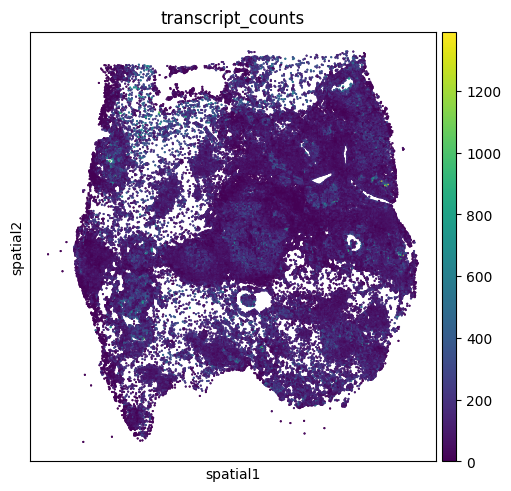

In [122]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "transcript_counts",
    ],
    wspace=0.4,
)

In [123]:
adata.obsm['spatial'].max(axis=0)

array([5941, 6500])

In [124]:
adata.obsm['spatial'].min(axis=0)

array([ 57, 282])

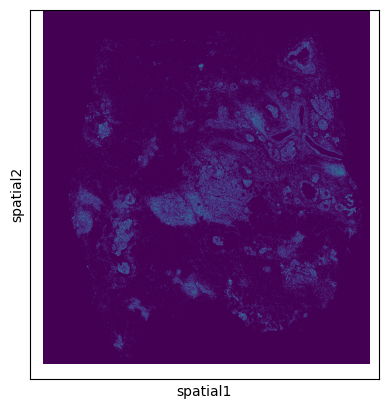

In [125]:
sc.pl.spatial(adata)

In [126]:
adata

AnnData object with n_obs × n_vars = 119855 × 377
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'transcripts', 'spatial'
    obsm: 'spatial'

In [130]:
df = adata.uns['transcripts'].copy()
df = df[df['cell_id']!='UNASSIGNED']
df

,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance
transcript_id,,,,,,,,,
281642480442157,kcmjdmgf-1,1,ESR1,56.590405,3515.1160,11.582922,40.000000,I4,0.000000
281642480453813,kcmjdmgf-1,1,RTKN2,57.322500,3514.1218,13.725247,11.705769,I4,0.000000
281642480454853,kcmjdmgf-1,0,CAVIN1,44.420967,3509.4973,11.659388,40.000000,I4,11.771505
281642480455788,kcmjdmgf-1,1,ACTG2,57.254250,3514.4114,12.018178,38.452570,I4,0.000000
281642480459175,kcmjdmgf-1,0,GNG11,62.431015,3510.5469,12.733532,32.105400,I4,4.655292
...,...,...,...,...,...,...,...,...,...
281724084828082,melhpefd-1,0,BANK1,5750.932600,4411.9023,17.478956,40.000000,K13,11.618243
281724084832213,melhpefd-1,0,LILRA4,5751.915500,4412.2510,18.011896,40.000000,K13,12.161602
281724084835455,melhpefd-1,0,CAVIN2,5764.464400,4397.6577,15.381452,40.000000,K13,14.639160


In [131]:
df['x_location'] = [int(x) for x in df['x_location']]
df['y_location'] = [int(x) for x in df['y_location']]
df

,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance
transcript_id,,,,,,,,,
281642480442157,kcmjdmgf-1,1,ESR1,56,3515,11.582922,40.000000,I4,0.000000
281642480453813,kcmjdmgf-1,1,RTKN2,57,3514,13.725247,11.705769,I4,0.000000
281642480454853,kcmjdmgf-1,0,CAVIN1,44,3509,11.659388,40.000000,I4,11.771505
281642480455788,kcmjdmgf-1,1,ACTG2,57,3514,12.018178,38.452570,I4,0.000000
281642480459175,kcmjdmgf-1,0,GNG11,62,3510,12.733532,32.105400,I4,4.655292
...,...,...,...,...,...,...,...,...,...
281724084828082,melhpefd-1,0,BANK1,5750,4411,17.478956,40.000000,K13,11.618243
281724084832213,melhpefd-1,0,LILRA4,5751,4412,18.011896,40.000000,K13,12.161602
281724084835455,melhpefd-1,0,CAVIN2,5764,4397,15.381452,40.000000,K13,14.639160


In [133]:
coord_to_transcripts = {}
for i, (x, y) in enumerate(zip(df['x_location'], df['y_location'])):
    key = (y, x)
    if key not in coord_to_transcripts:
        coord_to_transcripts[key] = []
    coord_to_transcripts[key].append(i)

6402270